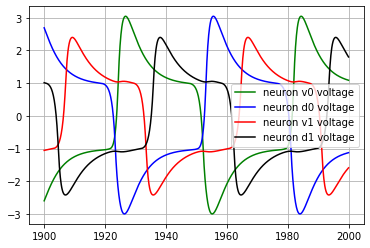

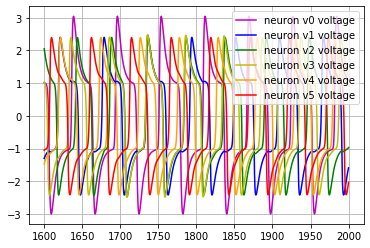

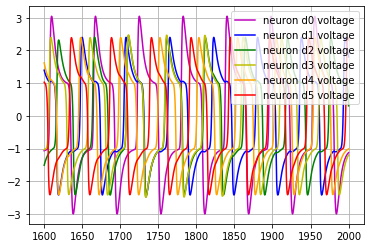

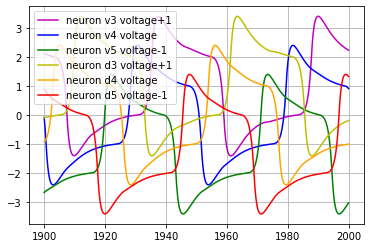

In [7]:
%matplotlib inline
# dorsal and ventral 6 neurons each side, one way connections, runs nicely
# HMH 20180722
# rechecked and run 20181115



#Imports
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

#constants
dx0= 1.0
dy0=-0.51
vx0= 1
vy0= -0.49
dx1= 1.0
dy1=-0.5
vx1= 1
vy1= -0.5
dx2= 1
dy2=-0.5
vx2= 1
vy2= -0.5
dx3= 1.0
dy3=-0.51
vx3= 1
vy3= -0.49
dx4= 1.0
dy4=-0.5
vx4= 1
vy4= -0.5
dx5= 1
dy5=-0.5
vx5= 1
vy5= -0.5
# amplitude
a0= 0
# frequency 
omega= 0.1
    
#vector of x and y values
v=[vx0,vy0,dx0,dy0,vx1,vy1,dx1,dy1,vx2, vy2, dx2, dy2, vx3, vy3, dx3, dy3, vx4, vy4, dx4, dy4, vx5, vy5, dx5, dy5 ]

#tests for times
#t = np.linspace(0, 20000, 100001) 
t = np.linspace(0, 2000, 20001)

def f(v):
    return min(max(-2 - v, v), 2 - v)

def FHND(v, t):
    # calculates the derivatives in FHN with diffusion
    vx0, vy0, dx0, dy0, vx1, vy1, dx1, dy1, vx2, vy2, dx2, dy2, vx3, vy3, dx3, dy3, vx4, vy4, dx4, dy4, vx5, vy5, dx5, dy5 = v
    # v denotes vector (x0, y0, x1, y1, x2, y2, x3, y3) passed to the function FHND
    # the statement x0, y0, x1, y1, x2, y2, x3, y3 = v assigns components in the vector v to the
    # corresponding components.
    # Thus, do not use v = x0, y0, x1, y1, x2, y2, x3, y3
    # this allows for four neurons
    # for now, just use one-⁠way coupling from neuron 0 to neuron 1
# allow for different epsilons
    e0 = 0.08   
    e1 = 0.08
    g = 0.8
    b0 = 0.46
    b1 = 0.47
 # diffusion constant
    Dhead = -0.2
    Drest= -0.02
    Dgap=0.03
    J = 0.5


    # 
    dvdt=[f(vx0)- vy0+ Dhead*dx0                  + J, e0*(vx0-g*vy0+b0),   # neurons 0 (ventral and dorsal)
          f(dx0)- dy0+ Dhead*vx0                  + J, e0*(dx0-g*dy0+b0),   # coupled by 1-way diffusion
                                                                                    # negative diffusion constant Dhead
                                                                                    # simulated inhibitory synapse

          f(vx1)- vy1+ Drest*dx1 + Dgap*(vx0-vx1) + J, e1*(vx1-g*vy1+b1),   # neurons 1 (ventral and dorsal)
          f(dx1)- dy1+ Drest*vx1 + Dgap*(dx0-dx1) + J, e1*(dx1-g*dy1+b1),   # driven by neurons 0 through one-way
                                                                                    # diffusion (selective gap junction)
                                                                                    # Dgap
                                                                                    # Drest simulates inhibitary synapse
                                                                                    # coupling ventral and dorsam neurons 1

          f(vx2)- vy2+ Drest*dx2 + Dgap*(vx1-vx2) + J, e1*(vx2-g*vy2+b1),   # neurons 2
          f(dx2)- dy2+ Drest*vx2 + Dgap*(dx1-dx2) + J, e1*(dx2-g*dy2+b1),

          f(vx3)- vy3+ Drest*dx3 + Dgap*(vx2-vx3) + J, e1*(vx3-g*vy3+b1),   # neurons 3
          f(dx3)- dy3+ Drest*vx3 + Dgap*(dx2-dx3) + J, e1*(dx3-g*dy3+b1),

          f(vx4)- vy4+ Drest*dx4 + Dgap*(vx3-vx4) + J, e1*(vx4-g*vy4+b1),   # neurons 4
          f(dx4)- dy4+ Drest*vx4 + Dgap*(dx3-dx4) + J, e1*(dx4-g*dy4+b1),

          f(vx5)- vy5+ Drest*dx5 + Dgap*(vx4-vx5) + J, e1*(vx5-g*vy5+b1),   # neurons 5
          f(dx5)- dy5+ Drest*vx5 + Dgap*(dx4-dx5) + J, e1*(dx5-g*dy5+b1)]


    # diffusion is represented by the term D*(x1-⁠x0)
    return dvdt

sol = odeint(FHND, v, t)   #the solver

#graphs

#Comparison between neuron 0 and 1
plt.plot(t[19000:20000],(sol[19000:20000,0]), 'g', label='neuron v0 voltage')
plt.plot(t[19000:20000],(sol[19000:20000,2]), 'b', label='neuron d0 voltage')
plt.plot(t[19000:20000],(sol[19000:20000,4]), 'r', label='neuron v1 voltage')
plt.plot(t[19000:20000],(sol[19000:20000,6]), 'k', label='neuron d1 voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

# ventral side
plt.plot(t[16000:20000],(sol[16000:20000,0]), 'm', label='neuron v0 voltage')
plt.plot(t[16000:20000],(sol[16000:20000,4]), 'b', label='neuron v1 voltage')
plt.plot(t[16000:20000],(sol[16000:20000,8]), 'g', label='neuron v2 voltage')
plt.plot(t[16000:20000],(sol[16000:20000,12]), 'y', label='neuron v3 voltage')
plt.plot(t[16000:20000],(sol[16000:20000,16]), 'orange', label='neuron v4 voltage')
plt.plot(t[16000:20000],(sol[16000:20000,20]), 'r', label='neuron v5 voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

# dorsal side
plt.plot(t[16000:20000],(sol[16000:20000,2]), 'm', label='neuron d0 voltage')
plt.plot(t[16000:20000],(sol[16000:20000,6]), 'b', label='neuron d1 voltage')
plt.plot(t[16000:20000],(sol[16000:20000,10]), 'g',label='neuron d2 voltage')
plt.plot(t[16000:20000],(sol[16000:20000,14]), 'y', label='neuron d3 voltage')
plt.plot(t[16000:20000],(sol[16000:20000,18]), 'orange', label='neuron d4 voltage')
plt.plot(t[16000:20000],(sol[16000:20000,22]), 'r', label='neuron d5 voltage')
plt.legend(loc='best')
plt.grid()
plt.show()

# last 3 on each side
plt.plot(t[19000:20000],(sol[19000:20000,12]+1), 'm', label='neuron v3 voltage+1')
plt.plot(t[19000:20000],(sol[19000:20000,16]), 'b', label='neuron v4 voltage')
plt.plot(t[19000:20000],(sol[19000:20000,20]-1), 'g', label='neuron v5 voltage-1')
plt.plot(t[19000:20000],(sol[19000:20000,14]+1), 'y', label='neuron d3 voltage+1')
plt.plot(t[19000:20000],(sol[19000:20000,18]), 'orange', label='neuron d4 voltage')
plt.plot(t[19000:20000],(sol[19000:20000,22]-1), 'r', label='neuron d5 voltage-1')
plt.legend(loc='best')
plt.grid()
plt.show()

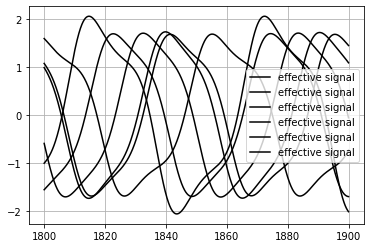

In [8]:
import scipy.ndimage.filters as filt
effective_signal=np.zeros((20001,24))
for neuron_number in range(0,6):
    effective_signal[:,neuron_number]=  (sol[:,4*neuron_number]+abs(sol[:,4*neuron_number]))/2 
    effective_signal[:,neuron_number]-=(sol[:,4*neuron_number+2]+abs(sol[:,4*neuron_number+2]))/2
    effective_signal[:,neuron_number]= filt.gaussian_filter1d(effective_signal[:,neuron_number],40) # Gaussian filter simulates
                                                                                                    # a combination of
                                                                                                    # muscle reponse to neural
                                                                                                    # stimulus
                                                                                                    # also effects of elastic
                                                                                                    # properties of worm and
                                                                                                    # also interaction with
                                                                                                    # fluid
    plt.plot(t[18000:19000],effective_signal[18000:19000,neuron_number], 'k', label='effective signal')
plt.legend(loc='best')
plt.grid()
plt.show()

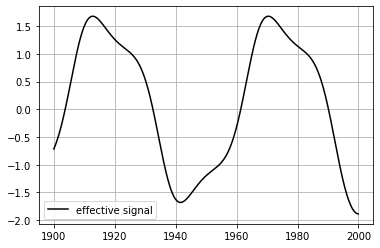

In [9]:
plt.plot(t[19000:20000],effective_signal[19000:20000,1], 'k', label='effective signal')
plt.legend(loc='best')
plt.grid()
plt.show()

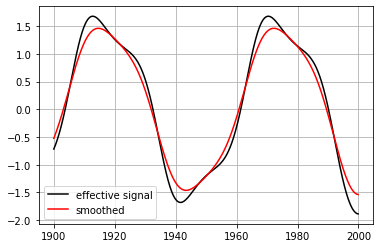

In [10]:
import scipy.ndimage.filters as filt

effective_signal_smooth_1 = filt.gaussian_filter1d(effective_signal[:,1],40)
plt.plot(t[19000:20000],effective_signal[19000:20000,1], 'k', label='effective signal')
plt.plot(t[19000:20000],effective_signal_smooth_1[19000:20000], 'r', label='smoothed')
plt.legend(loc='best')
plt.grid()
plt.show()

[0, 1, 2, 3, 4, 5, 6]
[0, -0.8420964324172882, -1.9258585726205426, -0.9833829708846494, 0.2817617207360176, 1.8746602294605585, 2.968453094682009]


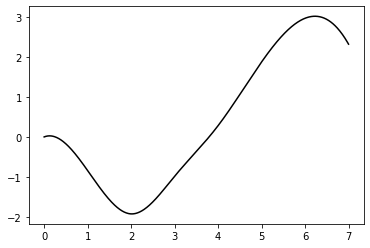

[0, 1, 2, 3, 4, 5, 6]
[0, -1.0101004536963565, -2.072043353972084, -1.0053034457753696, 0.3630873125619778, 1.922626121422731, 2.9721805912345207]


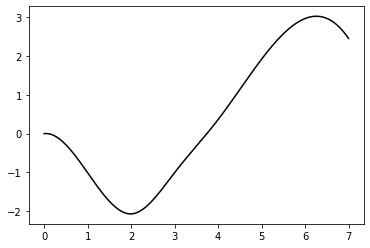

[0, 1, 2, 3, 4, 5, 6]
[0, -1.172809048998965, -2.211850443227919, -1.0295667195215394, 0.429869439468779, 1.9542875490025535, 2.9562516392604663]


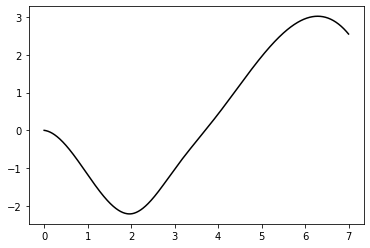

[0, 1, 2, 3, 4, 5, 6]
[0, -1.3273599432252474, -2.3417364103038807, -1.0542179908865121, 0.48318305481168156, 1.9713958267305431, 2.9216513839237694]


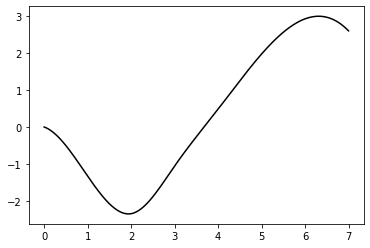

[0, 1, 2, 3, 4, 5, 6]
[0, -1.4710958145053754, -2.4583045807230635, -1.0771548943233566, 0.5246316835022231, 1.9760800547947772, 2.8697263603032095]


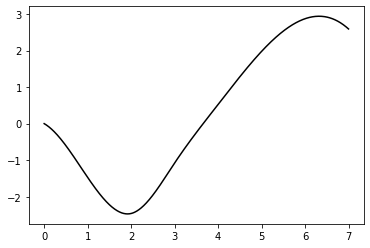

[0, 1, 2, 3, 4, 5, 6]
[0, -1.6016795774898402, -2.5584316241112273, -1.096205427305391, 0.5562733302880516, 1.9707719650088185, 2.8021349449042225]


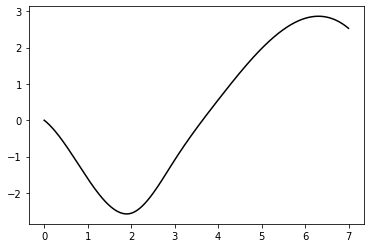

[0, 1, 2, 3, 4, 5, 6]
[0, -1.7171913584822467, -2.639379071029721, -1.1092097170997004, 0.5805222764232303, 1.958114104650444, 2.7207892456306872]


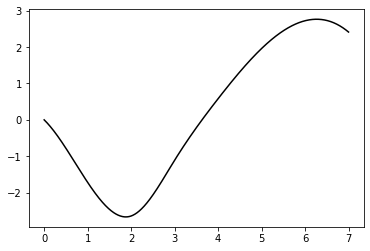

[0, 1, 2, 3, 4, 5, 6]
[0, -1.8162007641152638, -2.698883772089622, -1.1141012325762096, 0.6000330905950431, 1.940851752398627, 2.6277833678774734]


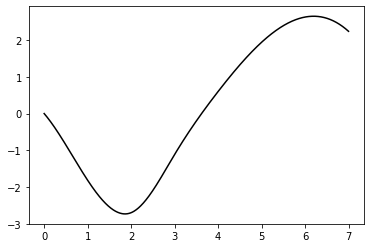

[0, 1, 2, 3, 4, 5, 6]
[0, -1.897810177658389, -2.7352232038227813, -1.1089832730533855, 0.6175744140475103, 1.921715015565677, 2.5253138750976625]


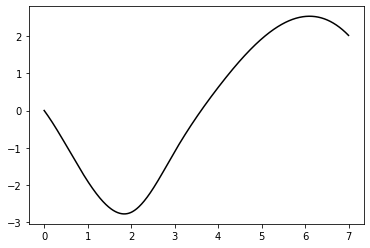

[0, 1, 2, 3, 4, 5, 6]
[0, -1.9616672966018833, -2.7472537752480704, -1.092197333395391, 0.6359000970249826, 1.9032986490751986, 2.4155987624524746]


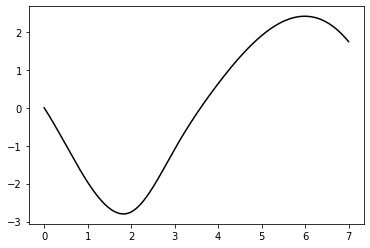

[0, 1, 2, 3, 4, 5, 6]
[0, -2.0079476727279504, -2.734422597121302, -1.0623805863714344, 0.6576274627257996, 1.8879526538579725, 2.300806241009087]


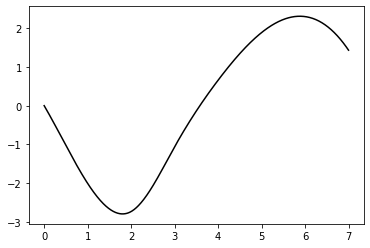

[0, 1, 2, 3, 4, 5, 6]
[0, -2.037310355365642, -2.6967552503384864, -1.0185109338437879, 0.6851311558033533, 1.877674868183419, 2.1829823395781163]


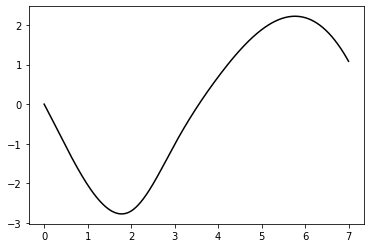

[0, 1, 2, 3, 4, 5, 6]
[0, -2.050831633937678, -2.6348236850860447, -0.959939324131859, 0.7204385719904602, 1.8740176321114448, 2.063986878318649]


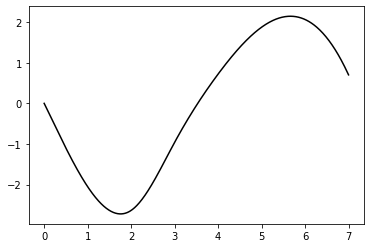

[0, 1, 2, 3, 4, 5, 6]
[0, -2.0499231604350108, -2.5496993306326923, -0.8864097493041481, 0.7651559012686284, 1.8780241833856082, 1.9454507954738696]


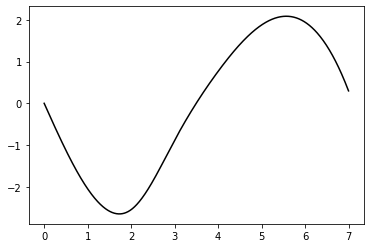

[0, 1, 2, 3, 4, 5, 6]
[0, -2.0362413253904914, -2.442896728502855, -0.7980680445930379, 0.8204115240649719, 1.8901804828011497, 1.828737916472778]


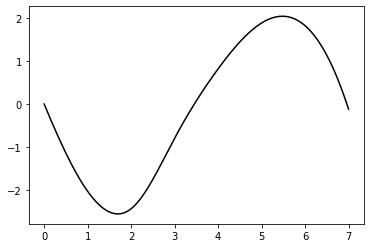

[0, 1, 2, 3, 4, 5, 6]
[0, -2.0115946706249583, -2.3163125552012627, -0.6954567343689364, 0.8868174144791112, 1.9103894273919757, 1.7149158515045806]


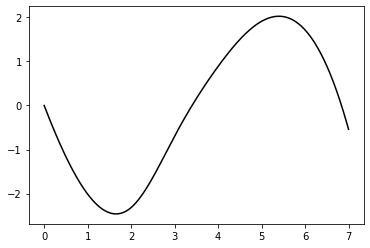

[0, 1, 2, 3, 4, 5, 6]
[0, -1.9778554232584533, -2.1721638934364234, -0.5795007000421504, 0.9644543091858282, 1.9379850639255958, 1.6047520087908493]


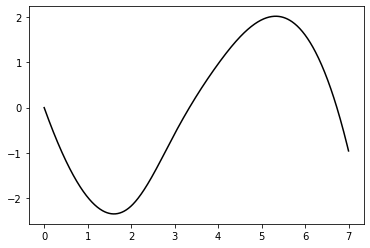

[0, 1, 2, 3, 4, 5, 6]
[0, -1.9368800484392128, -2.012928220738067, -0.45149502421701637, 1.0528776832858349, 1.9717541471596127, 1.498701340464976]


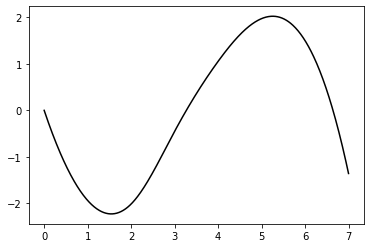

[0, 1, 2, 3, 4, 5, 6]
[0, -1.890442472344151, -1.8412863052818786, -0.313074017499386, 1.1511365178221658, 2.0099738444467037, 1.3968948725704378]


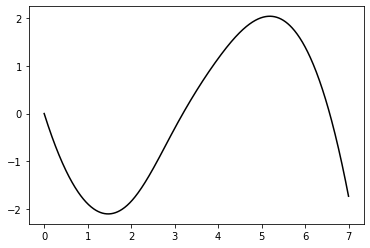

[0, 1, 2, 3, 4, 5, 6]
[0, -1.8401819484119804, -1.6600677173605085, -0.16617693073272033, 1.2578002610601529, 2.0504702548417333, 1.2991354477693173]


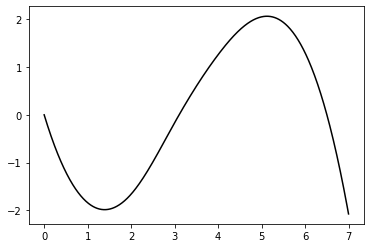

[0, 1, 2, 3, 4, 5, 6]
[0, -1.7875661350458605, -1.4721977310013634, -0.01301328665989998, 1.370996424016248, 2.090691007885727, 1.2048969251042432]


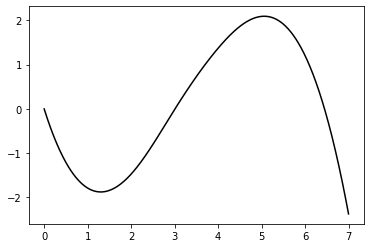

[0, 1, 2, 3, 4, 5, 6]
[0, -1.7338687355351952, -1.280643930137484, 0.14399790062191054, 1.4884779504545051, 2.1278100878822426, 1.1133490515309836]


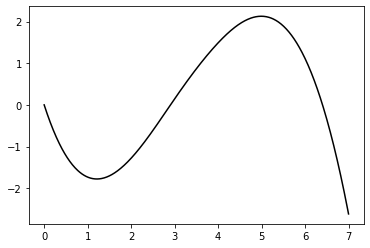

[0, 1, 2, 3, 4, 5, 6]
[0, -1.6801600533732235, -1.0883608523176989, 0.3022933588094203, 1.6076973877396177, 2.1588409201693093, 1.0233889784736496]


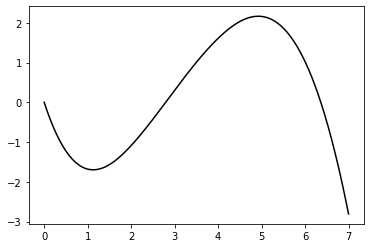

[0, 1, 2, 3, 4, 5, 6]
[0, -1.6273080811045888, -0.8982314678714748, 0.45922562892623964, 1.7258771406417557, 2.180745433685032, 0.9336725173302958]


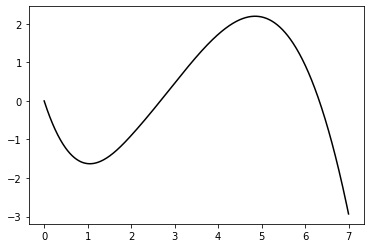

[0, 1, 2, 3, 4, 5, 6]
[0, -1.5759890227279993, -0.713006844508339, 0.612132894391484, 1.8400932679789421, 2.1905545025350053, 0.8426658519545562]


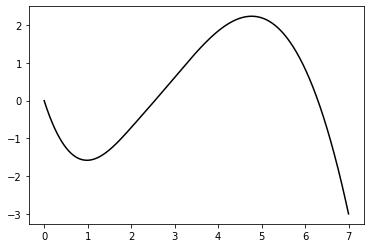

[0, 1, 2, 3, 4, 5, 6]
[0, -1.5267098116918585, -0.5352502092889229, 0.7584070529134868, 1.9473535239909536, 2.1854780327564263, 0.7487006974466393]


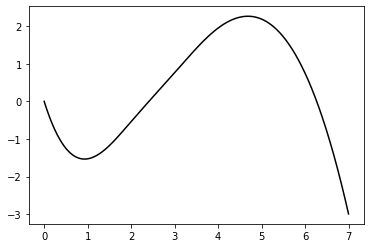

[0, 1, 2, 3, 4, 5, 6]
[0, -1.4798178828091635, -0.36726527635133843, 0.8955779308248395, 2.0446881179154603, 2.163020506165761, 0.650052367756909]


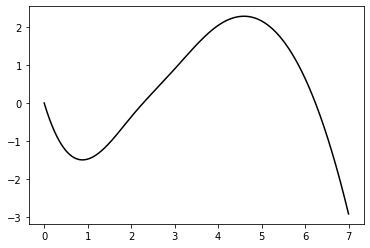

[0, 1, 2, 3, 4, 5, 6]
[0, -1.4355107034959564, -0.21102655293947925, 1.0213990790435312, 2.1292531763917504, 2.1210992809454963, 0.545040310517263]


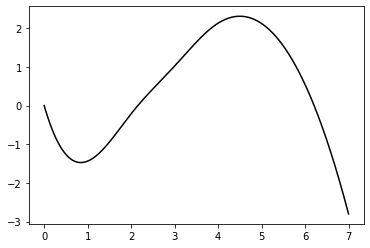

[0, 1, 2, 3, 4, 5, 6]
[0, -1.393870727263071, -0.06814265310621925, 1.133886087374596, 2.1983833571587192, 2.058099636058121, 0.4320857718188207]


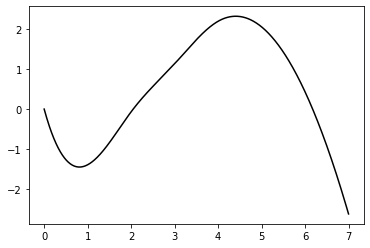

[0, 1, 2, 3, 4, 5, 6]
[0, -1.3548885184533423, 0.0601796233204519, 1.2313648152754735, 2.249651726127568, 1.9729227185691236, 0.3097814064053208]


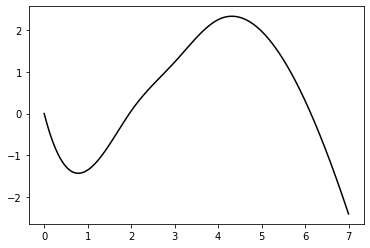

[0, 1, 2, 3, 4, 5, 6]
[0, -1.3184673733450774, 0.17317330656609853, 1.3125196333328715, 2.2809453284330354, 1.8650336728182844, 0.17697775841759045]


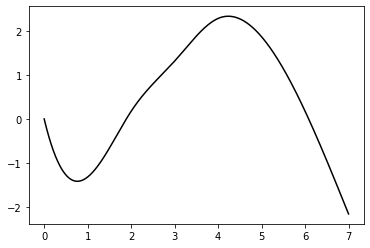

[0, 1, 2, 3, 4, 5, 6]
[0, -1.2844374758228276, 0.27052059250088134, 1.3764089135653717, 2.2905090906699677, 1.7344625338265547, 0.03283551947429131]


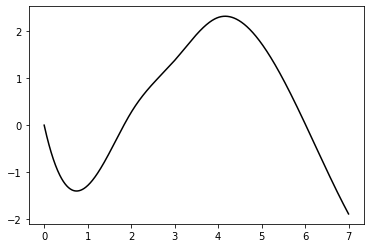

[0, 1, 2, 3, 4, 5, 6]
[0, -1.2525591213413851, 0.3523527898801868, 1.4224736605283212, 2.2769715443414045, 1.5817724416100059, -0.12314623993370266]


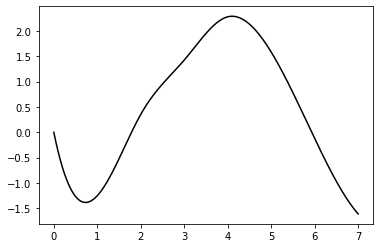

[0, 1, 2, 3, 4, 5, 6]
[0, -1.2225185836094241, 0.41923786805791896, 1.4505479724876813, 2.2393834151968073, 1.4080285951796851, -0.2910972032042156]


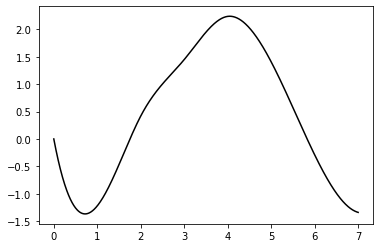

[0, 1, 2, 3, 4, 5, 6]
[0, -1.1939321725452132, 0.47214216877121107, 1.4608285904914302, 2.1772226540700754, 1.2147253041067594, -0.470792509705098]


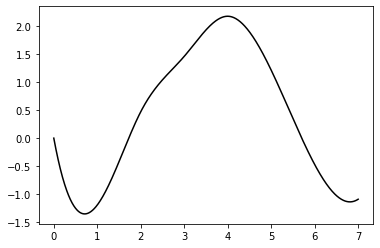

[0, 1, 2, 3, 4, 5, 6]
[0, -1.1663606925037122, 0.5123674203021775, 1.4538221704599708, 2.0903789709523357, 1.003688847135062, -0.6616871308556975]


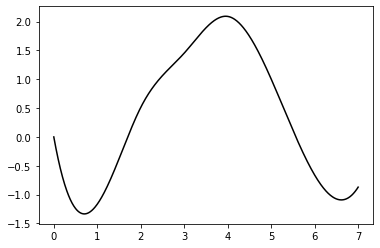

[0, 1, 2, 3, 4, 5, 6]
[0, -1.1392876722721998, 0.5415140680597288, 1.4303311622129176, 1.979178167567614, 0.7770216982084044, -0.8629194301575303]


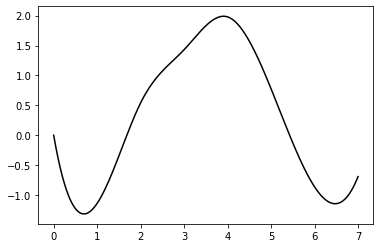

[0, 1, 2, 3, 4, 5, 6]
[0, -1.1121096515750004, 0.5614274074787291, 1.391426340558704, 1.844393060742111, 0.5370403353677788, -1.073333820819849]


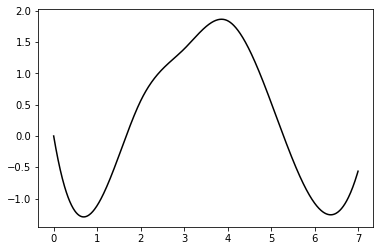

[0, 1, 2, 3, 4, 5, 6]
[0, -1.0841315682165897, 0.5741378907919614, 1.3384172031494748, 1.6872503706581419, 0.28622105319327273, -1.2915017940017397]


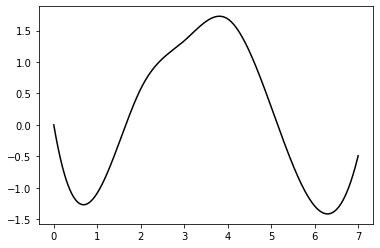

[0, 1, 2, 3, 4, 5, 6]
[0, -1.0545627699403692, 0.5818041438313217, 1.2728286473982409, 1.5094397302554292, 0.027164092974240717, -1.5157282934190197]


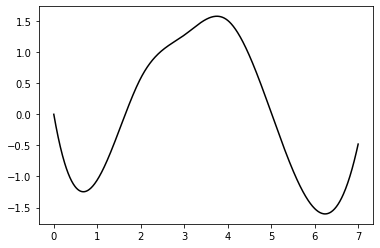

In [15]:
from scipy.interpolate import CubicSpline

number_of_bends = 6
for framenumber in range (0,200,5):
    s = 0     # arclength
    theta = 0
    svals = [s]
    thetavals= [theta]
    for j in range(0,number_of_bends):
        s += 1
        theta+= effective_signal[8000+framenumber,j]
        svals.append(s)
        thetavals.append(theta)
    print(svals)
    print(thetavals)
    # spline fit
    cstheta=CubicSpline(svals,thetavals)
    worm_coords=np.arange(0,number_of_bends+1.01,0.01)                         # I am incrementing the position in steps of 
                                                                                # 0.01*(distance between nodes)
    smooththeta=cstheta(worm_coords)
    plt.plot(worm_coords,smooththeta,'k')
    plt.show()

In [16]:
print(smooththeta)
type(smooththeta)

[ 0.         -0.04001842 -0.07928072 -0.11779184 -0.15555669 -0.19258019
 -0.22886725 -0.26442281 -0.29925177 -0.33335906 -0.36674959 -0.39942829
 -0.43140008 -0.46266987 -0.49324258 -0.52312313 -0.55231645 -0.58082745
 -0.60866105 -0.63582217 -0.66231573 -0.68814665 -0.71331985 -0.73784025
 -0.76171276 -0.78494231 -0.80753381 -0.82949219 -0.85082237 -0.87152926
 -0.89161778 -0.91109285 -0.9299594  -0.94822234 -0.96588658 -0.98295706
 -0.99943869 -1.01533638 -1.03065507 -1.04539966 -1.05957508 -1.07318624
 -1.08623807 -1.09873548 -1.1106834  -1.12208674 -1.13295043 -1.14327937
 -1.1530785  -1.16235273 -1.17110698 -1.17934617 -1.18707521 -1.19429904
 -1.20102256 -1.2072507  -1.21298838 -1.21824051 -1.22301201 -1.22730782
 -1.23113283 -1.23449198 -1.23739018 -1.23983235 -1.24182341 -1.24336829
 -1.24447189 -1.24513914 -1.24537496 -1.24518427 -1.24457199 -1.24354303
 -1.24210232 -1.24025477 -1.23800531 -1.23535885 -1.23232031 -1.22889462
 -1.22508669 -1.22090144 -1.21634379 -1.21141867 -1

numpy.ndarray

In [17]:
print(len(worm_coords))
print(len(smooththeta))

701
701


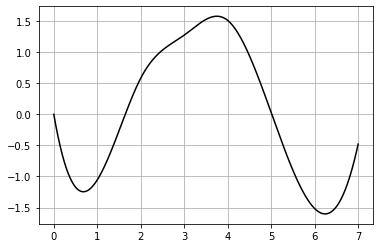

In [18]:
%matplotlib inline
plt.plot(worm_coords, smooththeta, 'k')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


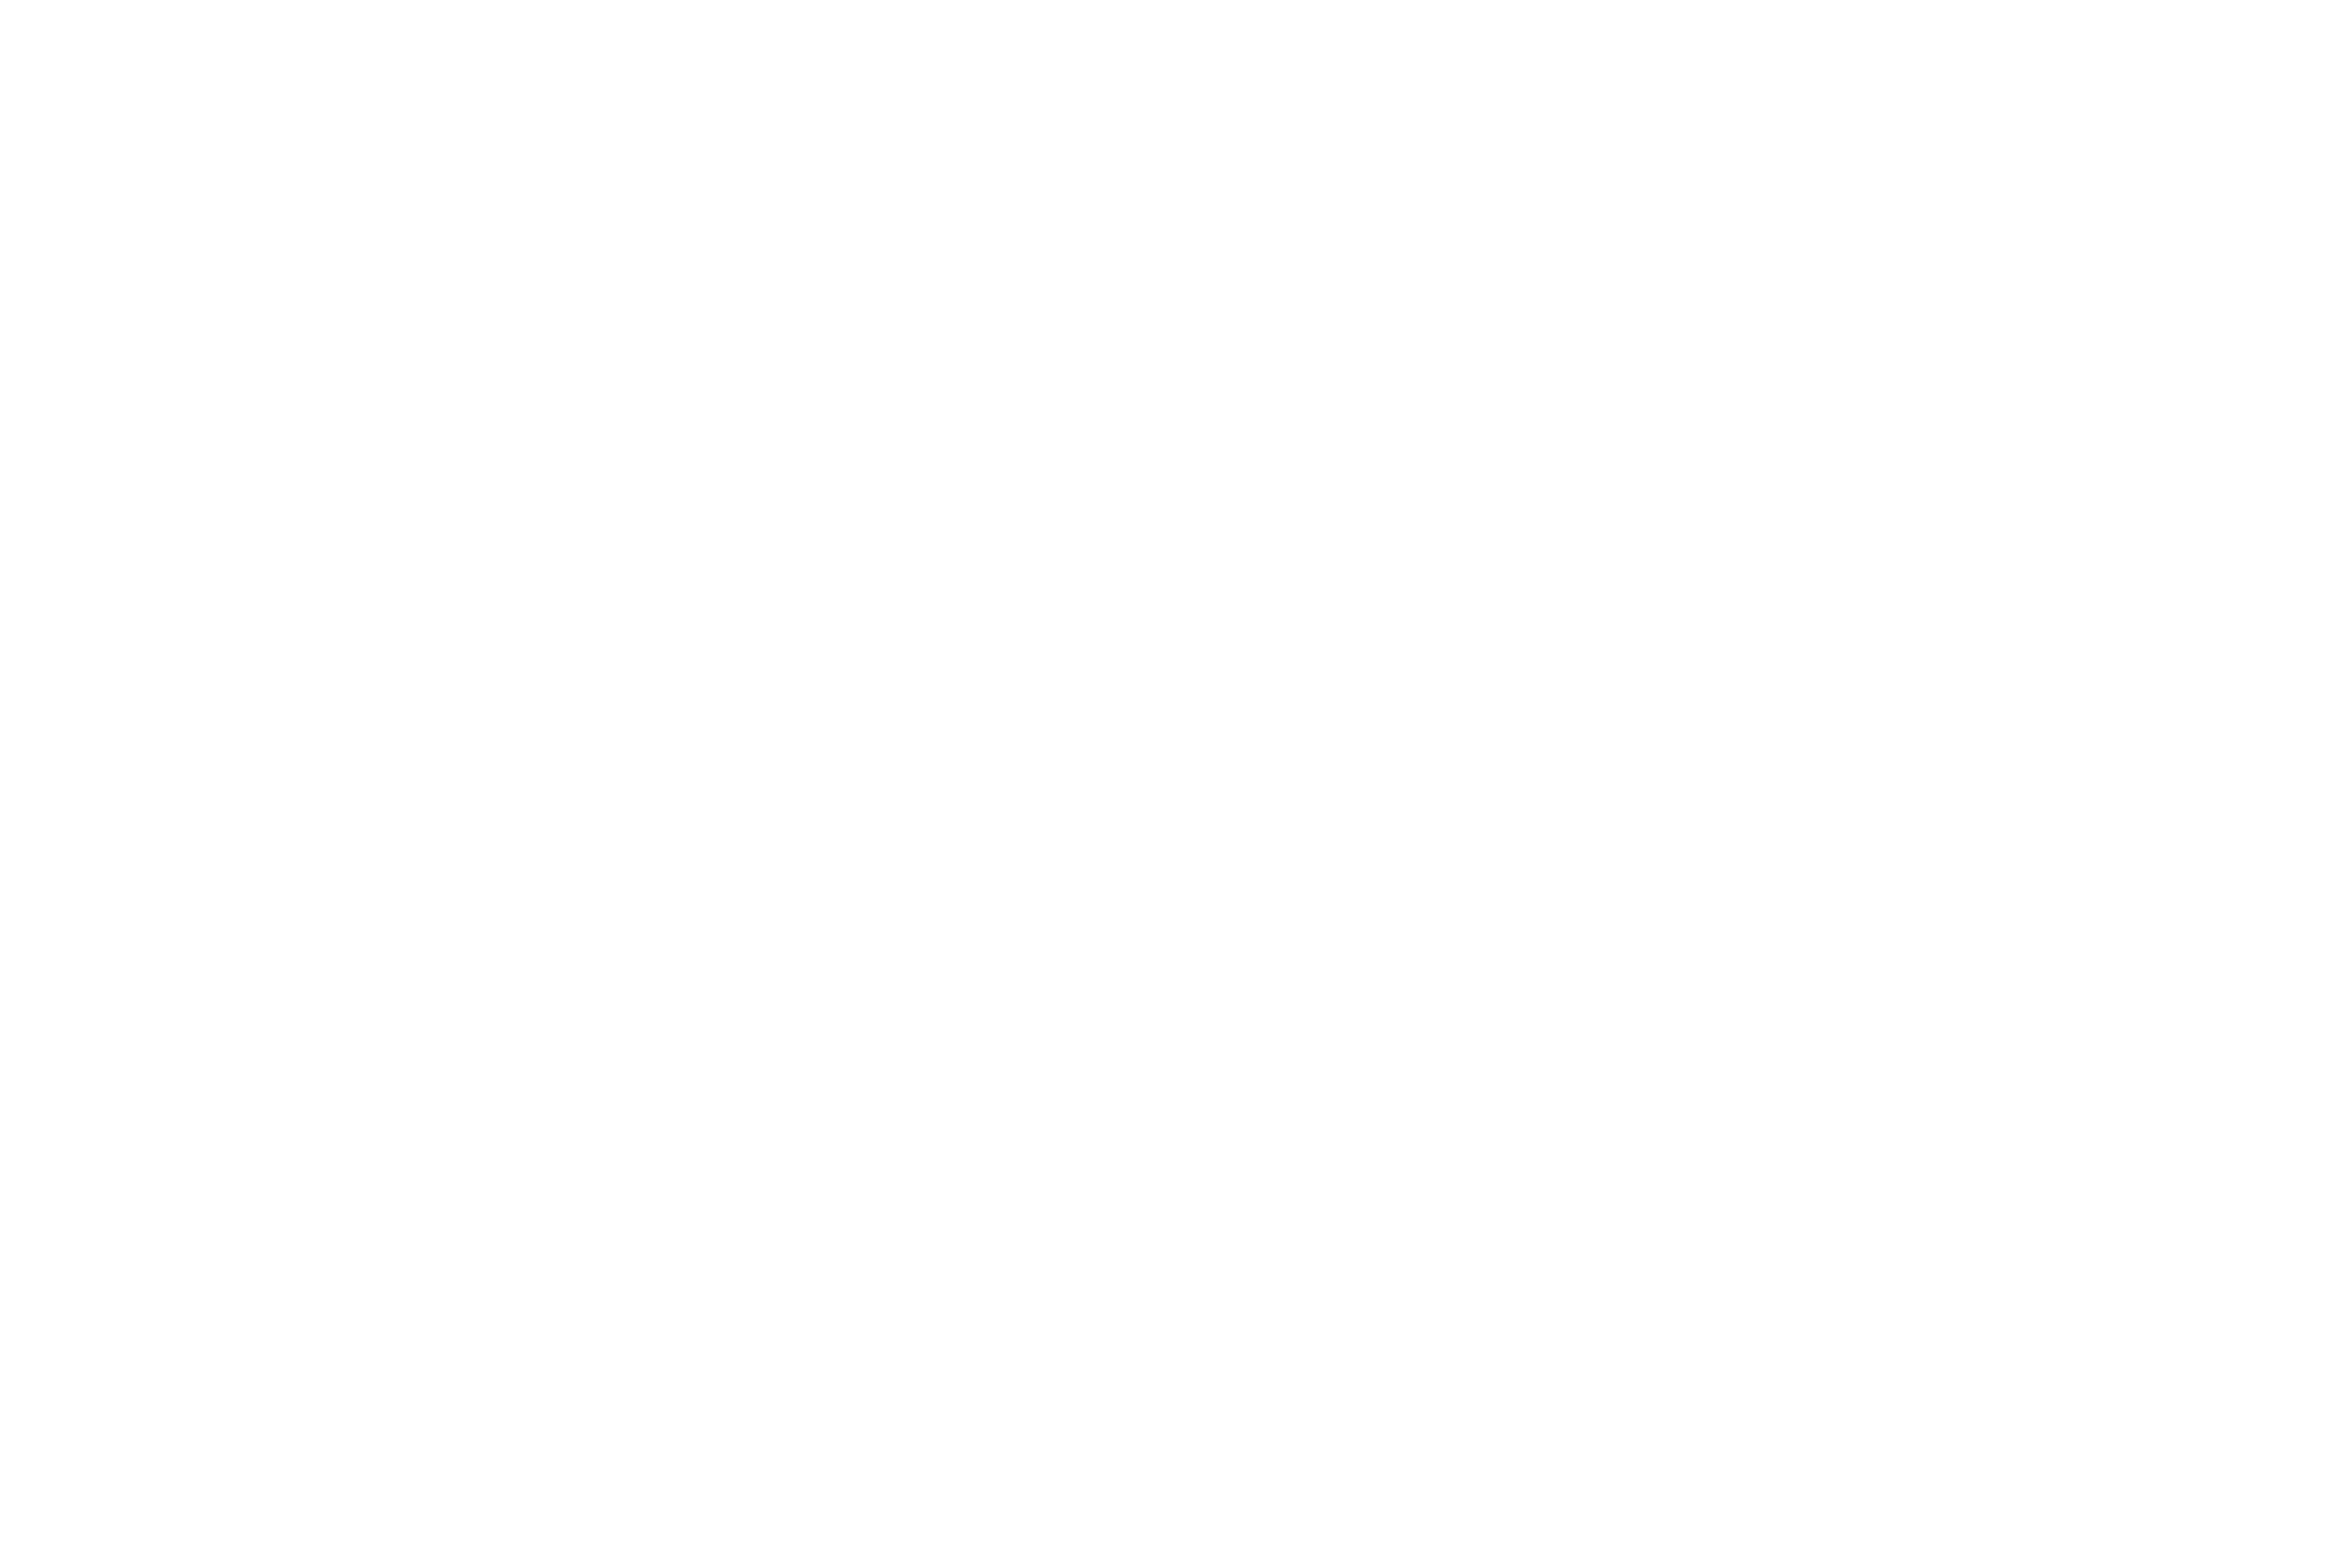

<IPython.core.display.Javascript object>


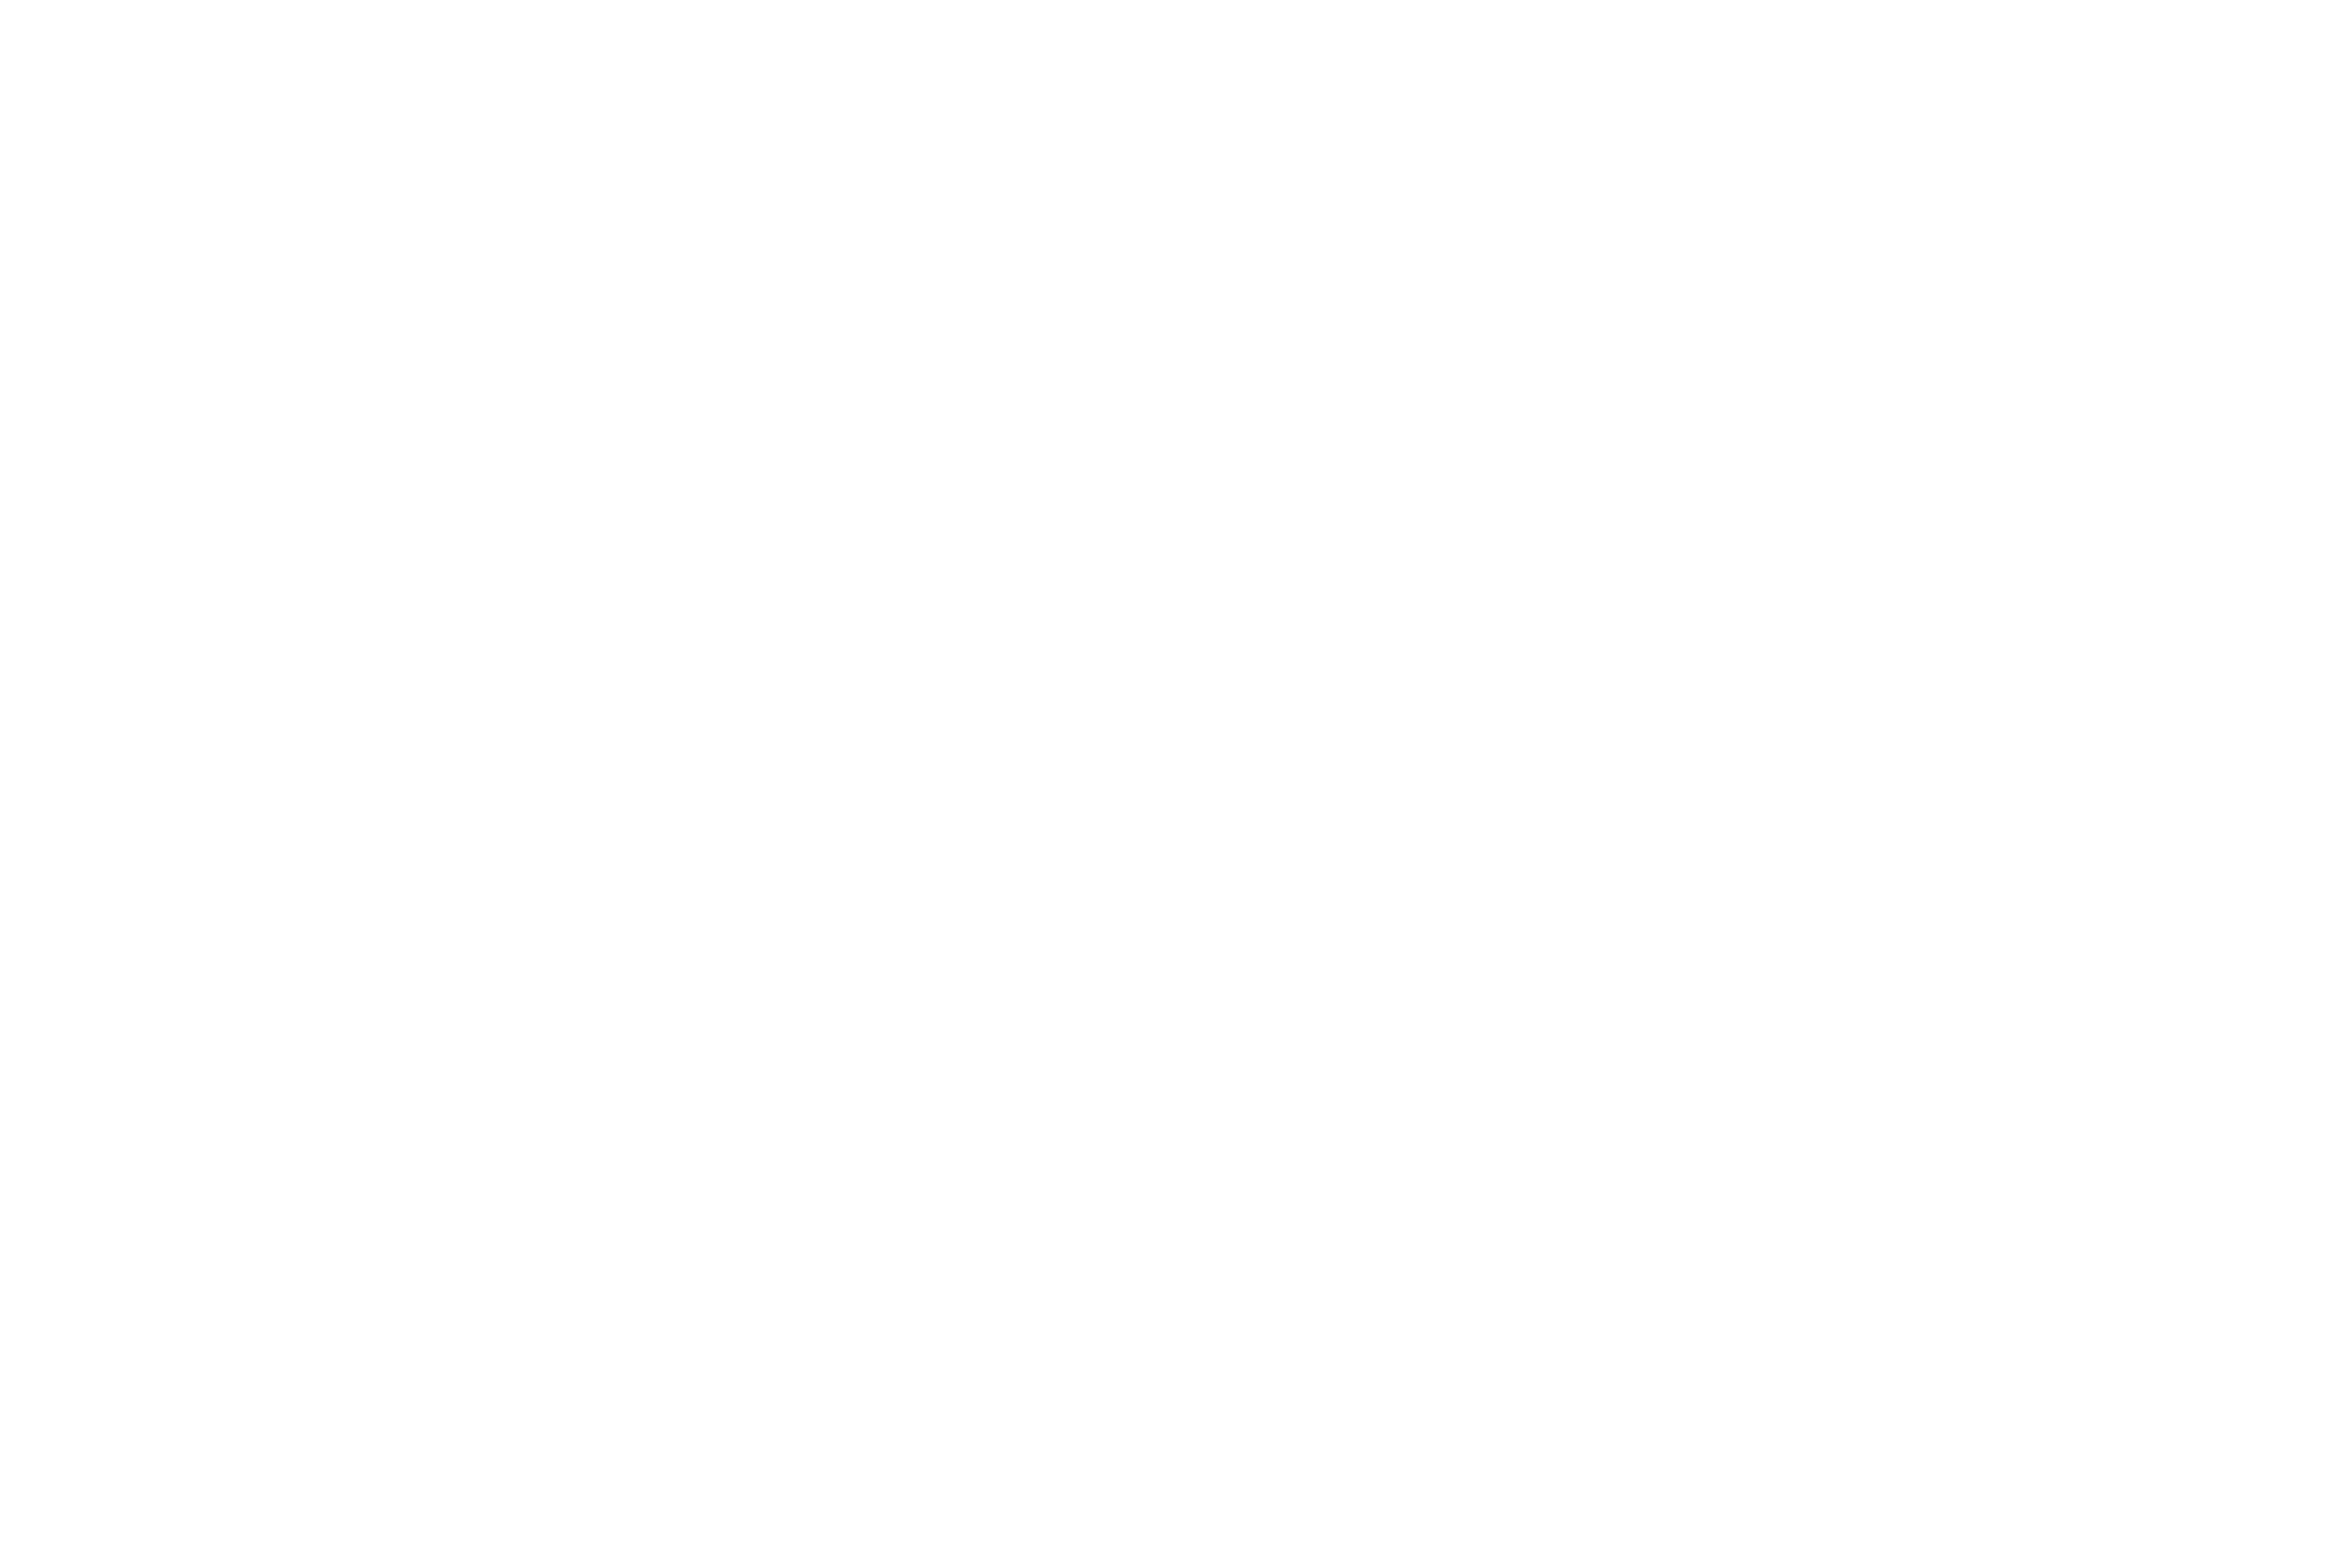

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [19]:
# worm_20180704 animates worms from neuronal inputs
# assumes effective_signal for 6 neurons, "time" in range 0 to 10000
# inspired by and uses https://matplotlib.org/examples/animation/double_pendulum_animated.html
#Imports


%matplotlib notebook   
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math
from scipy.interpolate import CubicSpline




number_of_joints = 6   # check #  # actually muscles #
tightness_of_bend=0.5

fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-8, 8), ylim=(-8, 8))
ax.grid()
ax.set_aspect('equal')

line, = ax.plot([], [], 'o-', lw=2)


def init():
    line.set_data([], [])
    return line


def animate(framenumber):
    # begin outer loop over frames in video
    xpos=0
    ypos=0
    # s = 0         to be added
    xcoords=[xpos]
    ycoords=[ypos]
    # scoords=[s]    to be added
    # deltatheta # this will be vector of neuronal inputs
    phase=0
    theta=0  



    for j in range(0,number_of_joints):
        deltatheta = effective_signal[8000+framenumber,j]
        theta+=tightness_of_bend*deltatheta 
        xpos=xpos+math.cos(theta)
        ypos=ypos+math.sin(theta)
        xcoords.append(xpos)
        ycoords.append(ypos)
        # print(i,deltatheta, xpos, ypos)


    # spline fit
    nodes=np.arange(0, number_of_joints+1)
    csx=CubicSpline(nodes,xcoords)
    csy=CubicSpline(nodes,ycoords)
    worm_coords=np.arange(0,number_of_joints+1.01,0.01)                         # I am incrementing the position in steps of 
                                                                                # 0.01*(distance between nodes)
    smoothwormx=csx(worm_coords)
    smoothwormy=csy(worm_coords)

    line.set_data(smoothwormx, smoothwormy)
    return line

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200),
                              interval=25, blit=True, init_func=init)

plt.show()


In [6]:
def save(ani, filename):
    writer = animation.FFMpegWriter(fps=15, metadata=dict(artist='Hastings, Harold and Singhvi, Anshul'), bitrate=3000)
    ani.save(filename, writer=writer)

save(ani, "smoothworm-keener.mp4")

NameError: name 'ani' is not defined